## A Classification Problem Statement using Stratified Cross-Validation

In [148]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [149]:
os.getcwd()

'C:\\Users\\kjk\\Desktop\\AcadGild\\Data Science\\Assignment-4\\Classification'

In [150]:
test=pd.read_csv('https://s3.amazonaws.com/acadgildsite/wordpress_images/datasets/titanic/test.csv')
train=pd.read_csv('https://s3.amazonaws.com/acadgildsite/wordpress_images/datasets/titanic/train.csv')
# train=pd.read_csv('train.csv')
# train=pd.read_csv('test.csv')

In [151]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


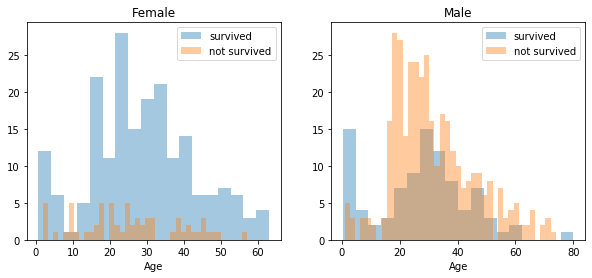

In [154]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

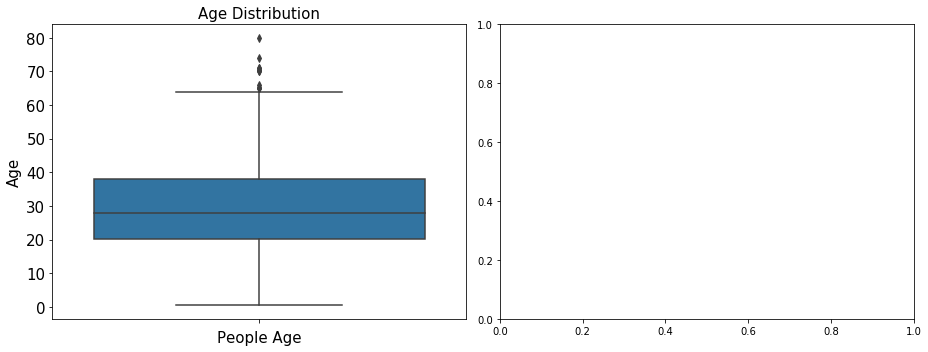

In [155]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'Age', data = train, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

# sns.distplot(train['Age'], ax = ax2)
# sns.despine(ax = ax2)
# ax2.set_xlabel('Age', fontsize=15)
# ax2.set_ylabel('Occurence', fontsize=15)
# ax2.set_title('Age x Ocucurence', fontsize=15)
# ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Embarked, Pclass and Sex:

C:\Users\kjk\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


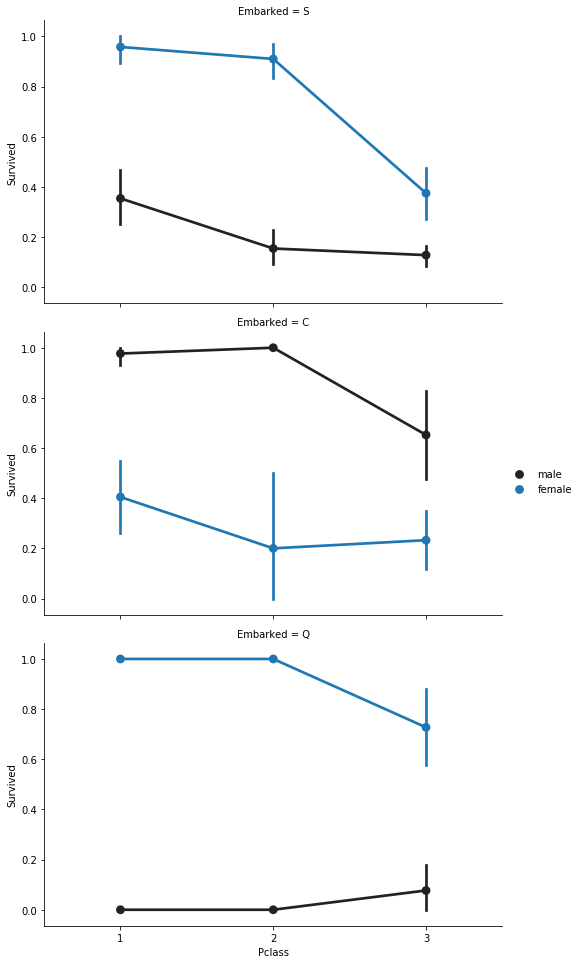

In [156]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

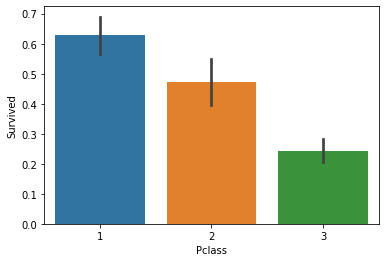

In [157]:
sns.barplot(x='Pclass', y='Survived', data=train)

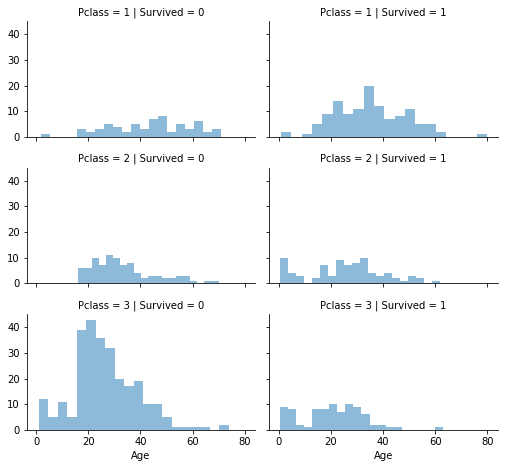

In [158]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### SibSp and Parch:

In [159]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\kjk\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


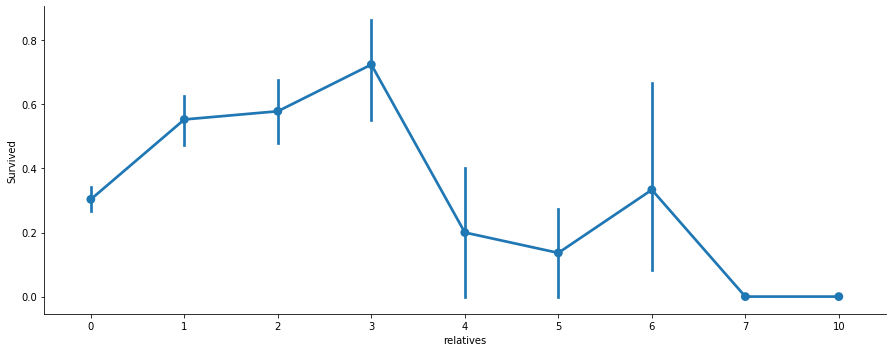

In [160]:
axes = sns.factorplot('relatives','Survived', 
                      data=train, aspect = 2.5, )


## Data preprocessing

##### we are droping the Passengerid because its everry are uniuqe.

In [161]:
train=train.drop(['PassengerId'],axis=1)
test=test.drop(['PassengerId'],axis=1)

In [162]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [163]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,0


### Deal with missing and duplicate values

In [164]:
def Check_duplicate(df):
    duplicate_row=df.duplicated().sum()
    null_values=df.isnull().sum()
    Total_null_values=sum(null_values)
    if(duplicate_row>0):
        print("Please remove duplicates Row=",duplicate_row)
    elif(Total_null_values>0):
            print("Please deal with Missing Values",null_values)
    else:
        print(duplicate_row,"duplicated and null/Missing vlues",Total_null_values," in this dataFrame")

In [165]:
Check_duplicate(train)

Please deal with Missing Values Survived       0
Pclass         0
Name           0
Sex            0
Age          177
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       2
relatives      0
not_alone      0
dtype: int64


In [166]:
Check_duplicate(test)

Please deal with Missing Values Pclass         0
Name           0
Sex            0
Age           86
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin        327
Embarked       0
relatives      0
not_alone      0
dtype: int64


Text(0.5, 1.0, 'we have see outlier in AGE Variable')

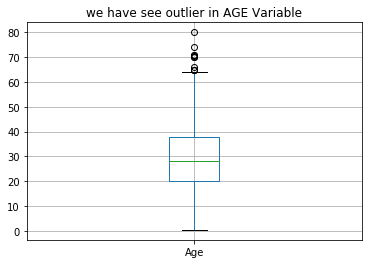

In [167]:
train.boxplot(column=['Age'])
plt.title('we have see outlier in AGE Variable')

In [168]:
# Quartiles
Q1=train['Age'].quantile(q = 0.25)
Q2=train['Age'].quantile(q = 0.50)
Q3=train['Age'].quantile(q = 0.75)
Q4=train['Age'].quantile(q = 1.00)
print('1º Quartile: ',Q1)
print('2º Quartile: ',Q2)
print('3º Quartile: ',Q3)
print('4º Quartile: ',Q4)
#Calculate the outliers:
IQR = Q3 - Q1 #Interquartile range,
# lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
# Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
  
print("Lower bound",Q1 - 1.5 * IQR)
print("Upper bound",Q3 + 1.5 * IQR)  
    

1º Quartile:  20.125
2º Quartile:  28.0
3º Quartile:  38.0
4º Quartile:  80.0
Lower bound -6.6875
Upper bound 64.8125


In [169]:
print('Numerber of outliers: ', train[train['Age'] > 64.8]['Age'].count())
print('Number of clients: ', len(train))
#Outliers in %
print('Outliers are:', round(train[train['Age'] > 64.8]['Age'].count()*100/len(train),2), '%')


Numerber of outliers:  11
Number of clients:  891
Outliers are: 1.23 %


In [170]:
## Flooring
train.loc[train["Age"] < (Q1 - 1.5 * IQR),"Age"] = train["Age"].quantile(0.05)

## Capping 

train.loc[train["Age"] > (Q3 + 1.5 * IQR),"Age"] = train["Age"].quantile(0.95)


In [171]:
train.iloc[train[train['Age'] > 64.8]['Age']]  # now no outliers

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone


Text(0.5, 1.0, 'No outlier in AGE Variable')

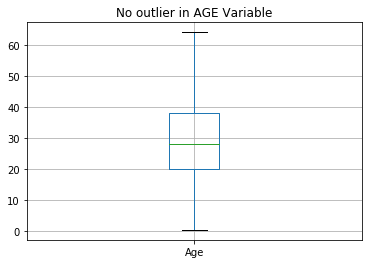

In [172]:
train.boxplot(column=['Age'])
plt.title('No outlier in AGE Variable')

In [173]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(train['Age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(train['Age'].std(), 1))

print('Median',round(train['Age'].median(),1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(train['Age'].std()*100/train['Age'].mean(), 1), ', High middle dispersion')

MEAN: 29.5
STD : 14.0
Median 28.0
CV  : 47.5 , High middle dispersion


In [174]:
train['Age']=train['Age'].fillna(train['Age'].mean())
test['Age']=test['Age'].fillna(test['Age'].mean())

In [175]:
Check_duplicate(train)

Please deal with Missing Values Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       2
relatives      0
not_alone      0
dtype: int64


In [176]:
Check_duplicate(test)

Please deal with Missing Values Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin        327
Embarked       0
relatives      0
not_alone      0
dtype: int64


In [177]:
train['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [178]:
# import re
# deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
# data = [train, test]

# for dataset in data:
#     dataset['Cabin'] = train['Cabin'].fillna("U0")
#     dataset['Deck'] = train['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
#     dataset['Deck'] = train['Deck'].map(deck)
#     dataset['Deck'] = train['Deck'].fillna(0)
#     dataset['Deck'] = train['Deck'].astype(int)
# we can now drop the cabin feature
train = train.drop(['Cabin'], axis=1)
test= test.drop(['Cabin'], axis=1)

In [179]:
Check_duplicate(train)

Please deal with Missing Values Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     2
relatives    0
not_alone    0
dtype: int64


In [180]:
train['Embarked'].mode()

0    S
dtype: object

In [181]:
train.dropna(inplace=True)

In [182]:
Check_duplicate(train)

0 duplicated and null/Missing vlues 0  in this dataFrame


In [183]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
Survived     889 non-null int64
Pclass       889 non-null int64
Name         889 non-null object
Sex          889 non-null object
Age          889 non-null float64
SibSp        889 non-null int64
Parch        889 non-null int64
Ticket       889 non-null object
Fare         889 non-null float64
Embarked     889 non-null object
relatives    889 non-null int64
not_alone    889 non-null int32
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 86.8+ KB


In [184]:
# test=test['Fare'].fillna(test['Fare'].mean())

In [185]:
Check_duplicate(train)

0 duplicated and null/Missing vlues 0  in this dataFrame


In [186]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


In [187]:
Check_duplicate(train)  # now age have no duplicte and no outlier

0 duplicated and null/Missing vlues 0  in this dataFrame


In [188]:
Check_duplicate(test)  # now age have no duplicte and no outlier

Please deal with Missing Values Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
relatives    0
not_alone    0
dtype: int64


In [189]:
test.dropna(inplace=True)

#### Fare:
Converting “Fare” from float to int64, using the “astype()” function pandas provides:


In [190]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

Text(0.5, 1.0, 'outlier in Fare Variable')

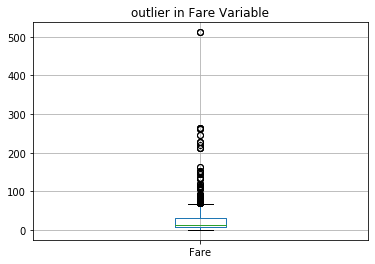

In [191]:
train.boxplot(column=['Fare'])
plt.title('outlier in Fare Variable')

In [192]:
# Quartiles
Q1_f=train['Fare'].quantile(q = 0.25)
Q2_f=train['Fare'].quantile(q = 0.50)
Q3_f=train['Fare'].quantile(q = 0.75)
Q4_f=train['Fare'].quantile(q = 1.00)
print('1º Quartile: ',Q1_f)
print('2º Quartile: ',Q2_f)
print('3º Quartile: ',Q3_f)
print('4º Quartile: ',Q4_f)
#Calculate the outliers:
IQR_f = Q3_f - Q1_f #Interquartile range,
# lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
# Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
  
print("Lower bound",Q1_f - 1.5 * IQR_f)
print("Upper bound",Q3_f + 1.5 * IQR_f)  
    

1º Quartile:  7.0
2º Quartile:  14.0
3º Quartile:  31.0
4º Quartile:  512.0
Lower bound -29.0
Upper bound 67.0


In [193]:
## Flooring
train.loc[train["Fare"] < (Q1_f - 1.5 * IQR_f),"Fare"] = train["Fare"].quantile(0.05)

## Capping 

train.loc[train["Fare"] > (Q3_f + 1.5 * IQR_f),"Fare"] = train["Fare"].quantile(0.95)


Text(0.5, 1.0, 'No outlier in Fare Variable')

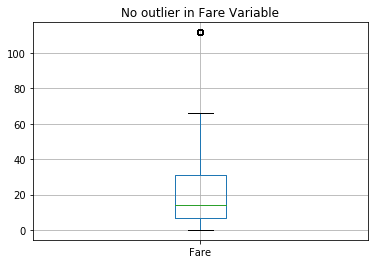

In [194]:
train.boxplot(column=['Fare'])
plt.title('No outlier in Fare Variable')

In [195]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
Survived     889 non-null int64
Pclass       889 non-null int64
Name         889 non-null object
Sex          889 non-null object
Age          889 non-null float64
SibSp        889 non-null int64
Parch        889 non-null int64
Ticket       889 non-null object
Fare         889 non-null float64
Embarked     889 non-null object
relatives    889 non-null int64
not_alone    889 non-null int32
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 86.8+ KB


In [196]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
Pclass       417 non-null int64
Name         417 non-null object
Sex          417 non-null object
Age          417 non-null float64
SibSp        417 non-null int64
Parch        417 non-null int64
Ticket       417 non-null object
Fare         417 non-null int32
Embarked     417 non-null object
relatives    417 non-null int64
not_alone    417 non-null int32
dtypes: float64(1), int32(2), int64(4), object(4)
memory usage: 35.8+ KB


### Name:
We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [197]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train= train.drop(['Name'], axis=1)
test= test.drop(['Name'], axis=1)

### Sex:
Convert ‘Sex’ feature into numeric.


In [198]:
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)


### Ticket:

In [199]:
train['Ticket'].describe()

count      889
unique     680
top       1601
freq         7
Name: Ticket, dtype: object

##### Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.


In [200]:
train= train.drop(['Ticket'], axis=1)
test= test.drop(['Ticket'], axis=1)

### Embarked:
Convert ‘Embarked’ feature into numeric.


In [201]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

### Creating Categories:
We will now create categories within the following features:

In [202]:
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

In [203]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,0,3,0,2,1,0,7.0,0,1,0,1
1,1,1,1,5,1,0,111.8,1,1,0,3
2,1,3,1,3,0,0,7.0,0,0,1,2
3,1,1,1,5,1,0,53.0,0,1,0,3
4,0,3,0,5,0,0,8.0,0,0,1,1


In [204]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,3,0,5,0,0,7,2,0,1,1
1,3,1,6,1,0,7,0,1,0,3
2,2,0,6,0,0,9,2,0,1,1
3,3,0,3,0,0,8,0,0,1,1
4,3,1,2,1,1,12,0,2,0,3


### Now we are select the feature

In [205]:
y=train.Survived

In [206]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [207]:
data=train.drop(['Survived'], axis=1)

In [209]:
data['Fare'] = data['Fare'].astype(np.int64)

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
Pclass       889 non-null int64
Sex          889 non-null int64
Age          889 non-null int32
SibSp        889 non-null int64
Parch        889 non-null int64
Fare         889 non-null int64
Embarked     889 non-null int64
relatives    889 non-null int64
not_alone    889 non-null int32
Title        889 non-null int64
dtypes: int32(2), int64(8)
memory usage: 69.5 KB


In [211]:
X_train = train.drop(['Survived'], axis=1)

In [212]:
y_train=train.Survived

In [214]:
X_train['Fare'] = X_train['Fare'].astype(np.int64)

In [215]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
Pclass       889 non-null int64
Sex          889 non-null int64
Age          889 non-null int32
SibSp        889 non-null int64
Parch        889 non-null int64
Fare         889 non-null int64
Embarked     889 non-null int64
relatives    889 non-null int64
not_alone    889 non-null int32
Title        889 non-null int64
dtypes: int32(2), int64(8)
memory usage: 69.5 KB


In [216]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,3,0,2,1,0,7,0,1,0,1
1,1,1,5,1,0,111,1,1,0,3
2,3,1,3,0,0,7,0,0,1,2
3,1,1,5,1,0,53,0,1,0,3
4,3,0,5,0,0,8,0,0,1,1


In [217]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [218]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.model_selection import KFold


### Standarized Our variable

In [219]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(test)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### LOGISTIC REGRESSION

In [235]:
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_train)

# predict our train dataset

cnf_matrix=confusion_matrix(y_train, logpred)
print("Confusion Matrix on Train Dataset:")
print(confusion_matrix(y_train, logpred))
print(round(accuracy_score(y_train, logpred),2)*100)



Confusion Matrix on Train Dataset:
[[474  75]
 [ 89 251]]
82.0


C:\Users\kjk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Stratified cross-validation
Stratification is a technique where we rearrange the data in a way that each fold has a good representation of the whole dataset. It forces each fold to have at least m instances of each class

In [236]:
# Stratified cross validation
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print('strtified cross validation accuracy',LOGCV)

strtified cross validation accuracy 0.8088738508682329


C:\Users\kjk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kjk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kjk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kjk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kjk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

In [221]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_train, logpred))
print(round(accuracy_score(y_train, logpred),2)*100)

[[474  75]
 [ 89 251]]
82.0


Confusion matrix, without normalization
[[474  75]
 [ 89 251]]


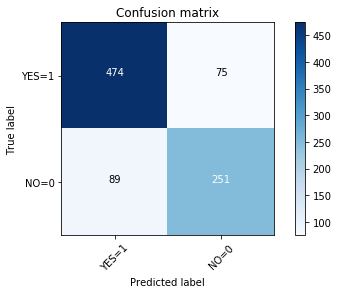

In [222]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['YES=1','NO=0'],normalize= False,  title='Confusion matrix')

### Model applying on Test dataset

In [223]:
logpred = logmodel.predict(X_test)

# confusion matrix
# cnf_matrix=confusion_matrix(y_train, logpred)
# print(confusion_matrix(y_train, logpred))
# print(round(accuracy_score(y_train, logpred),2)*100)


### DECESION TREE

In [224]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
from sklearn.tree import export_graphviz

In [225]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [226]:
# use the model to make predictions with the test data
y_pred_train = dtree.predict(X_train)
y_pred_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,

### Evaluate the model's performance on Train Datasets

Including the tree's axis-parallel decision boundaries and how the tree splits

In [227]:
# how did our model perform?
# count_misclassified =(y_test!= y_pred).sum()
# print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.83


In [228]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

### Cross Validation

Cross Validation is a technique which involves reserving a particular sample of a data set on which you do not train the model. Later, you test the model on this sample before finalizing the model.

In [229]:
# from sklearn.cross_validation import KFold

# cv = KFold(n=len(bank_final),  # Number of elements
#            n_folds=10,            # Desired number of cv folds
#            random_state=12) 
cv = KFold(n_splits=10, shuffle=True, random_state=0)

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
Pclass       889 non-null int64
Sex          889 non-null int64
Age          889 non-null int32
SibSp        889 non-null int64
Parch        889 non-null int64
Fare         889 non-null int64
Embarked     889 non-null int64
relatives    889 non-null int64
not_alone    889 non-null int32
Title        889 non-null int64
dtypes: int32(2), int64(8)
memory usage: 109.5 KB


In [233]:
data.isnull().sum()

Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
relatives    0
not_alone    0
Title        0
dtype: int64

In [ ]:
fold_accuracy = []

# titanic_train["Sex"] = encoded_sex

for train_fold, valid_fold in cv.split(data):
    train = data.loc[train_fold] # Extract train data with cv indices
    valid = data.loc[valid_fold] # Extract valid data with cv indices
    
    train_y = y.loc[train_fold]
    valid_y = y.loc[valid_fold]
    
    model = dtree.fit(X = train, 
                           y = train_y)
    valid_acc = model.score(X = valid, 
                            y = valid_y)
    fold_accuracy.append(valid_acc)    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))